Dataset used in this notebook can be found in the folder of this mini project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
banknotes_data = pd.read_csv("data_banknote_authentication.csv")

In [3]:
banknotes_data.head()

,Variance,Skewness,Cutosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


As we can see here we have 4 feautres
    1. Variance
    2. Skewness
    3. Cutosis
    4. Entropy
 
Because we have 3+ feautres we will need to reduce set dimensionality so we can visualize it nicely.

### Data preprocessing

Only step in preprocessing phase that we will need to take is to separate features and labels.

In [4]:
features = banknotes_data.iloc[:, :-1].values
labels = banknotes_data.iloc[:, -1].values

### Sklearn LDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
reduced_data = lda.fit_transform(features, labels)

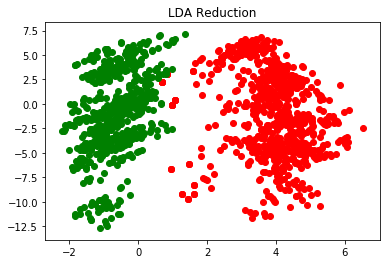

In [8]:
class_colors = ['red', 'green']
for i in (np.unique(labels)):
    for j in range(len(reduced_data)):
        if labels[j] == i:
            plt.scatter(reduced_data[j, 0], reduced_data[j, 1], color=class_colors[i])
# plt.legend()
plt.title("LDA Reduction")
plt.show()

### Bonus: lets test PCA on supervised data

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(features)

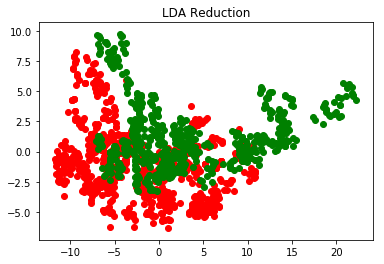

In [12]:
class_colors = ['red', 'green']
for i in (np.unique(labels)):
    for j in range(len(reduced_data_pca)):
        if labels[j] == i:
            plt.scatter(reduced_data_pca[j, 0], reduced_data_pca[j, 1], color=class_colors[i])
# plt.legend()
plt.title("LDA Reduction")
plt.show()

This is why we are using LDA for supervised learning. As you can see on the first (LDA) graph there are exactly two blobs for two classes.

PCA is the best when we don't have classes in our dataset (this is also called unsupervised learning), which is mostly always in the industry.

There is another algorithm for dimensionality reduction called t-SNE. It is the best for visualizing complex data (example images).